In [127]:
import pandas as pd
import csv
import plotly.graph_objects as go


In [128]:
class tsf:
    def __init__(self, tsf_path='', df=None, schema=None, timestep=None):
        self.tsf_path = tsf_path
        self.timestep = None
        self.dirty = False
        if tsf_path:
            with open(tsf_path) as f:
                csvreader = csv.reader(f, delimiter='\t')
                names = next(csvreader)[1:]
                func = next(csvreader)[1:]
                units = next(csvreader)[1:]
                if len(set(names)) != len(names):
                    raise TsfError('dumplicated names found in tsf file: %s' % names)
                schema = dict(zip(names, zip(func, units)))
            df = pd.read_csv(tsf_path, sep='\t', skiprows=[1, 2], index_col=0, parse_dates=True)
            self.df = df
            self.schema = schema
        else:
            self.schema = schema
            if df is None:
                df = pd.DataFrame()
            self.df = df

In [129]:
def scatter_plot(df, depth_fld, velocity_fld, depth_unit='in', velocity_unit='fps'):
    # https://github.com/plotly/plotly.py/issues/1445

    df = df.copy()
    df._velocity = df[velocity_fld]
    df._depth = df[depth_fld]
    fig = go.FigureWidget()
    trace1 = fig.add_scattergl(x=df._velocity, y=df._depth, mode='markers', name='points',
                             marker = dict(size=5,
                                           opacity=.5,
                                           color='#1f77b4',
                                           line = dict(width=1, color = '#1f77b4')
                                          )
                            )
    trace2 = fig.add_histogram(x=df._velocity, name='velocity', marker=dict(color='#1f77b4', opacity=0.7),
                          yaxis='y2'
                         )
    trace3 = fig.add_histogram(y=df._depth, name='depth', marker=dict(color='#1f77b4', opacity=0.7), 
                          xaxis='x2'
                         )
    fig.layout = dict(xaxis=dict(domain=[0, 0.85], showgrid=True, zeroline=False, title='Velocity(%s)' % velocity_unit),
                      yaxis=dict(domain=[0, 0.85], showgrid=True, zeroline=False, title='Depth(%s)' % depth_unit),
                      showlegend=False,
                      margin=dict(t=50),
                      hovermode='closest',
                      bargap=0,
                      xaxis2=dict(domain=[0.85, 1], showgrid=False, zeroline=False),
                      yaxis2=dict(domain=[0.85, 1], showgrid=False, zeroline=False),
                      height=600,
                      width=600,
                      title = 'Scatter Plot'
                     )

    def do_zoom(layout, xaxis_range, yaxis_range):
        inds = ((xaxis_range[0] <= flow.df._velocity) & (flow.df._velocity <= xaxis_range[1]) &
                (yaxis_range[0] <= flow.df._depth) & (flow.df._depth <= yaxis_range[1]))

        with fig.batch_update():
            trace2.x = flow.df._velocity[inds]
            trace3.y = flow.df._depth[inds]

    fig.layout.on_change(do_zoom, 'xaxis.range', 'yaxis.range')
    return fig

# Scatter Plot Vel vs Depth

In [131]:
f = r"C:\Users\Mel.Meng\Desktop\test\flow.tsf"
flow = tsf(f)
scatter_plot(df=flow.df, depth_fld='_depth', velocity_fld='_velocity', depth_unit='in', velocity_unit='fps')

FigureWidget({
    'data': [{'marker': {'color': '#1f77b4', 'line': {'color': '#1f77b4', 'width': 1}, 'opacity…

# Flow monitoring Data Plot

In [133]:
f = r"C:\Users\Mel.Meng\Desktop\test\rainfall.tsf"
rain = tsf(f)
f = r"C:\Users\Mel.Meng\Desktop\test\flow.tsf"
flow = tsf(f)
fig = flow_plot(flow_df=flow.df, rain_df=rain.df, depth_fld='_depth', velocity_fld='_velocity', flow_fld='_flow', rainfall_fld='test', depth_unit='in', rainfall_unit='in/hr', flow_unit='mgd')

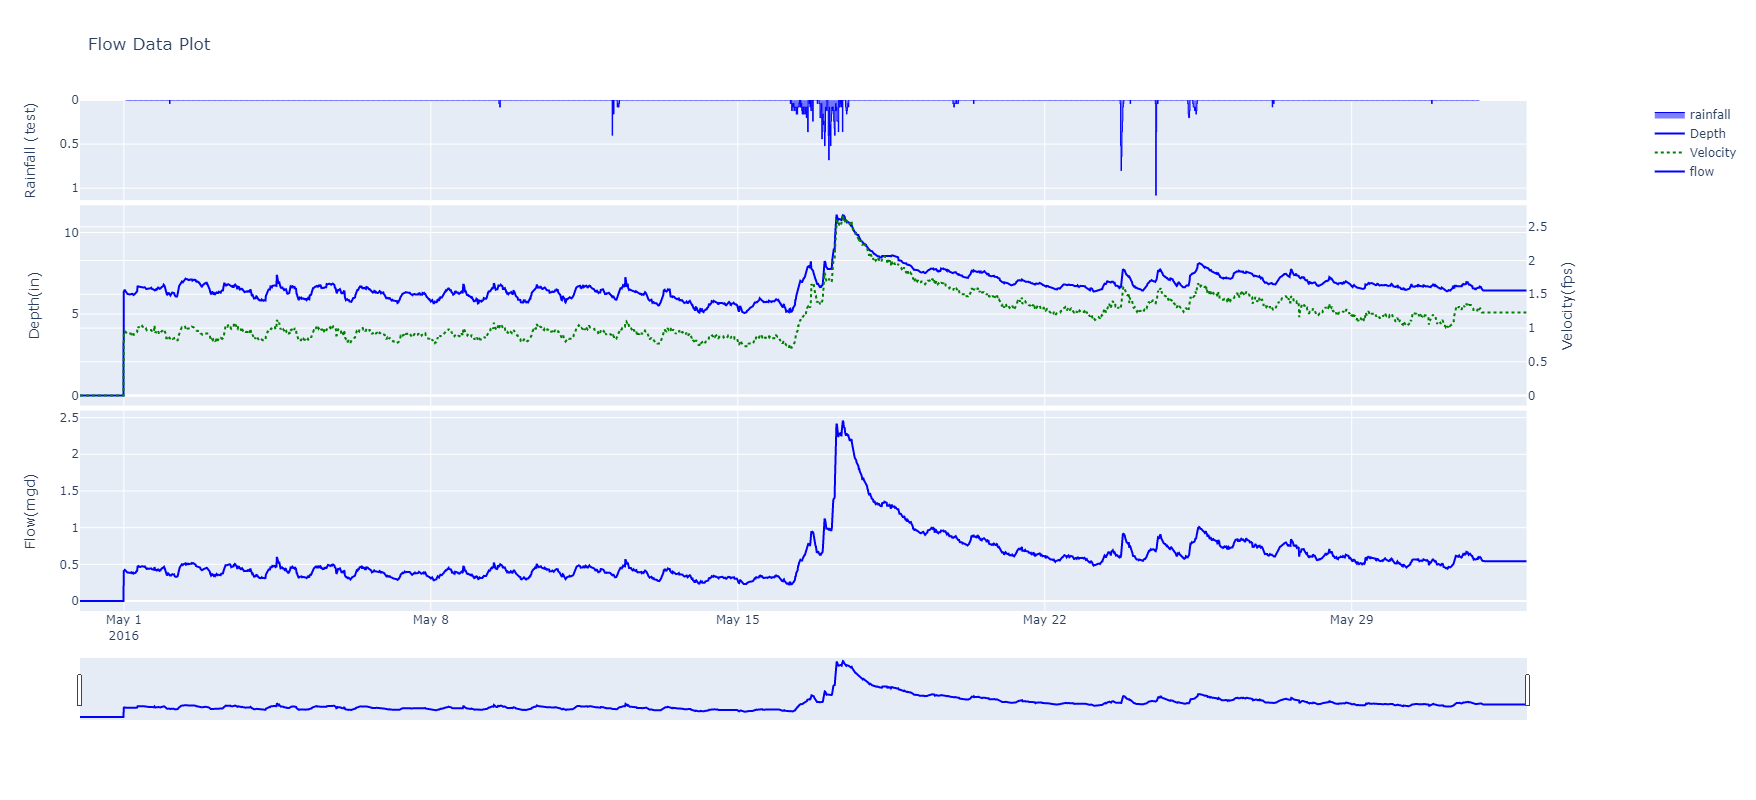

In [134]:
fig

In [138]:
print(fig['layout']['xaxis']['range'])

None
